In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

insurance_dataset = pd.read_csv('Realistic_Insurance_Dataset.csv')

In [2]:
# Find number of rows and columns
insurance_dataset.shape

(11338, 7)

In [3]:
# getting some info about dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11338 entries, 0 to 11337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       11338 non-null  int64  
 1   sex       11338 non-null  object 
 2   bmi       11338 non-null  float64
 3   children  11338 non-null  int64  
 4   smoker    11338 non-null  object 
 5   region    11338 non-null  object 
 6   charges   11338 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 620.2+ KB


In [4]:
# charges is target and the rest of columns are features. 4 of them are categorical values.

In [5]:
#checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
#Data Analysis

In [7]:
#statistical measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,11338.000000,11338.000000,11338.000000,11338.000000
mean,40.836038,27.451641,1.926001,23724.429121
std,13.564570,5.283674,1.498843,9639.543047
min,18.000000,15.000000,0.000000,1121.873900
25%,29.000000,23.836621,1.000000,16491.430939
50%,41.000000,27.397024,2.000000,23631.636496
75%,53.000000,30.885707,3.000000,31499.795018
max,64.000000,53.130000,5.000000,63770.428010


/Users/pranavmody/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


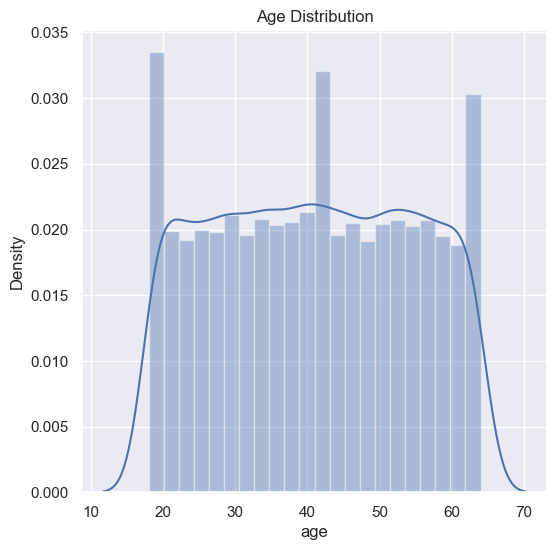

In [8]:
# distribution of age values 
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

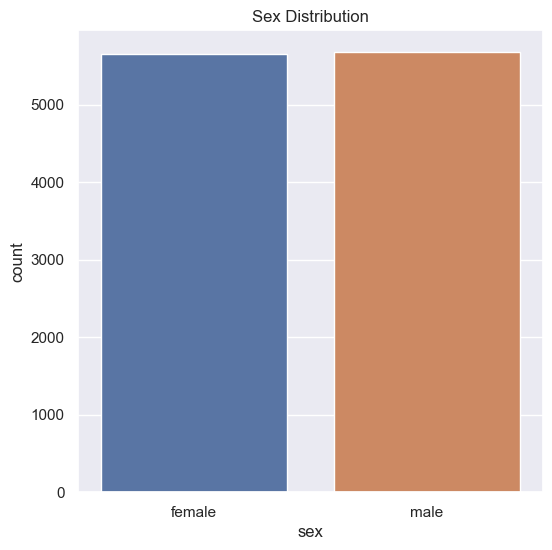

In [9]:
# Distribution of Gender Column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [10]:
insurance_dataset['sex'].value_counts()

male      5678
female    5660
Name: sex, dtype: int64

/Users/pranavmody/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


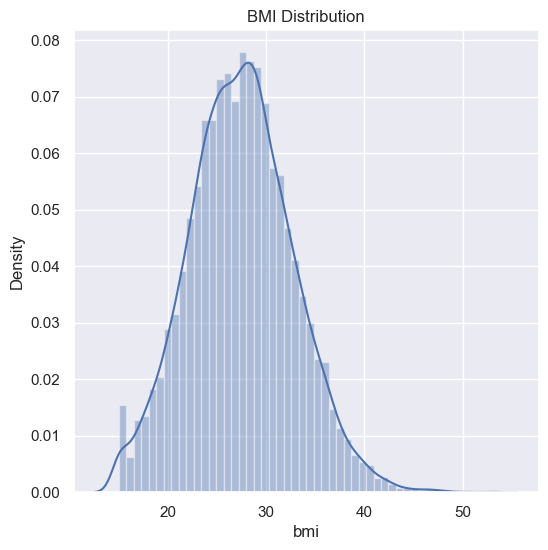

In [11]:
#BMI Distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

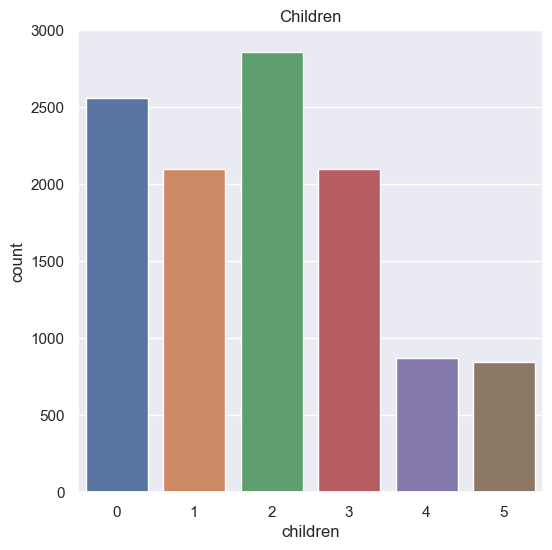

In [12]:
# Children Column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.show()

In [13]:
insurance_dataset['children'].value_counts()

2    2858
0    2559
1    2102
3    2101
4     874
5     844
Name: children, dtype: int64

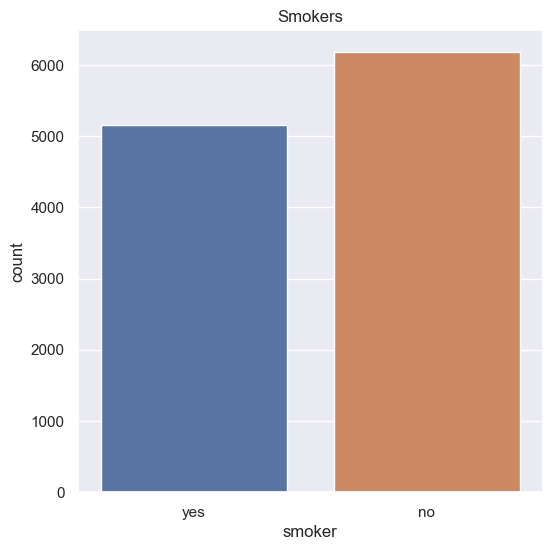

In [14]:
# Smoker Column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('Smokers')
plt.show()

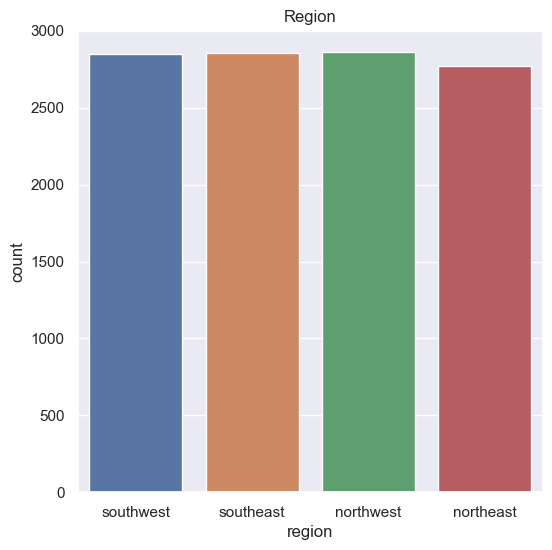

In [15]:
# Region Column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('Region')
plt.show()

In [16]:
insurance_dataset['region'].value_counts()

northwest    2861
southeast    2855
southwest    2852
northeast    2770
Name: region, dtype: int64

/Users/pranavmody/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


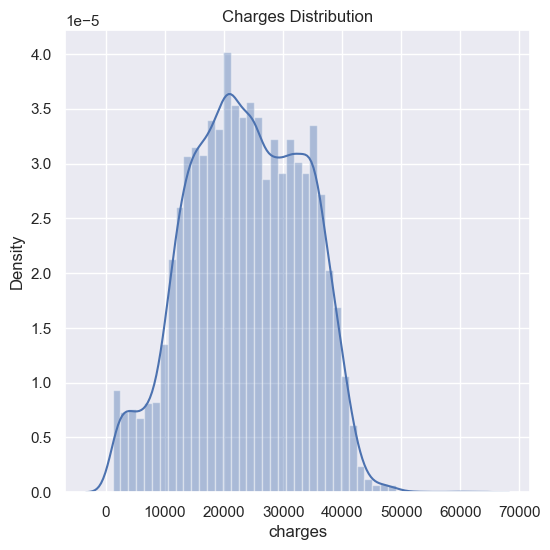

In [17]:
#Charges Distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

In [18]:
# Data Preprocessing


In [19]:
# Encoding the categorical features
insurance_dataset.replace({'sex':{'male':0, 'female':1}}, inplace=True)
insurance_dataset.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)
insurance_dataset.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2,'northwest':3}}, inplace=True)

In [20]:
#splitting the features and target

In [21]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

In [22]:
print(X)

       age  sex        bmi  children  smoker  region
0       19    1  27.900000         0       0       1
1       18    0  33.770000         1       1       0
2       28    0  33.000000         3       1       0
3       33    0  22.705000         0       1       3
4       32    0  28.880000         0       1       3
...    ...  ...        ...       ...     ...     ...
11333   33    0  34.126200         0       1       2
11334   29    0  23.809358         0       1       0
11335   18    1  23.699451         0       1       2
11336   25    1  34.914243         1       0       2
11337   30    1  25.312487         1       1       1

[11338 rows x 6 columns]


In [23]:
print(Y)

0        16884.924000
1         1725.552300
2         4449.462000
3        21984.470610
4         3866.855200
             ...     
11333    18921.496369
11334    14520.723854
11335     9376.531008
11336    28601.899815
11337    14231.381143
Name: charges, Length: 11338, dtype: float64


In [24]:
#Splitting the data into Training data and Testing Data

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(11338, 6) (9070, 6) (2268, 6)


In [27]:
#Model Training

In [28]:
#loading the linear Regression Model
regressor = LinearRegression()

In [29]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [30]:
#Model Evaluation

In [31]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [32]:
#R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared value: ', r2_train)

R squared value:  0.831609227513816


In [33]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [34]:
#R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared value: ', r2_test)

R squared value:  0.8249409531491547


In [35]:
#Build a Predictive system 

In [41]:
input_data = (24,1,23.1,1,1,2)

#changing input data to numpy arrays

input_data_as_numpy_array = np.asarray(input_data)

#reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print('The Insurance cost is USD ',prediction[0])

The Insurance cost is USD  11247.977590035109


/Users/pranavmody/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
